In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv("datasets/placement.csv")

In [56]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [58]:
df.isnull().any()

Unnamed: 0    False
cgpa          False
iq            False
placement     False
dtype: bool

In [6]:
# STEPS

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [59]:
df = df.iloc[:, 1:]

In [60]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [61]:
import matplotlib.pyplot as plt

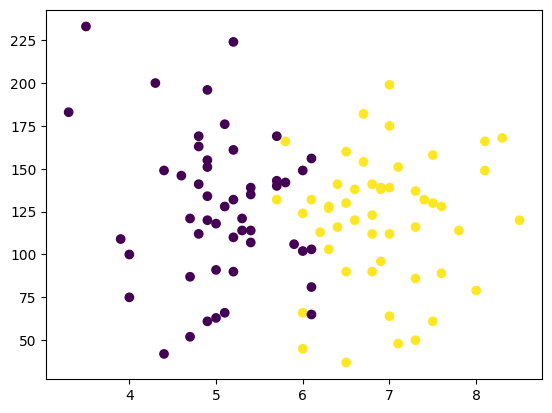

In [62]:
plt.scatter(df.cgpa, df.iq, c = df['placement']);

In [63]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [64]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [65]:
y.shape

(100,)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# train_test_split(X, y, test_size=0.1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [73]:
X_train

,cgpa,iq
28,5.2,90.0
62,6.0,102.0
72,7.3,116.0
5,7.1,48.0
31,3.9,109.0
...,...,...
41,5.4,114.0
77,7.3,50.0
12,5.4,139.0
24,4.7,121.0


In [74]:
y_test

20    1
71    1
99    1
27    1
69    1
66    1
37    1
44    1
39    0
4     0
Name: placement, dtype: int64

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [77]:
X_train_scaled  = scaler.fit_transform(X_train) 

In [78]:
X_train_scaled 

array([[-0.64317626, -0.82714078],
       [ 0.07146403, -0.53473095],
       [ 1.23275449, -0.19358614],
       [ 1.05409442, -1.8505752 ],
       [-1.80446672, -0.36415854],
       [-0.64317626,  2.43810237],
       [ 1.05409442,  0.65927588],
       [-0.91116637,  1.75581276],
       [ 0.16079406,  0.78111331],
       [ 1.41141457,  0.14755867],
       [ 0.69677428,  1.41466795],
       [-0.19652608,  1.09789063],
       [ 1.23275449,  0.31813107],
       [-0.46451619, -0.41289352],
       [-0.55384622, -0.07174871],
       [ 0.16079406, -0.51036346],
       [-1.35781654,  0.61054091],
       [-0.91116637, -1.53379788],
       [ 0.42878417,  0.41560102],
       [ 0.51811421,  0.14755867],
       [ 0.07146403,  0.61054091],
       [ 0.78610432, -0.02301374],
       [ 0.42878417, -0.19358614],
       [ 1.23275449, -0.92461073],
       [ 2.12605485,  1.07352314],
       [-0.19652608,  0.46433599],
       [-0.73250629, -1.41196045],
       [ 1.41141457,  0.82984828],
       [-0.91116637,

In [23]:
X_test_scaled  = scaler.fit_transform(X_test) 

In [24]:
X_test_scaled

array([[ 1.55069428, -0.40012806],
       [ 0.37790029,  0.60019209],
       [-1.9676877 ,  0.80025612],
       [-0.01303104,  1.20038418],
       [-0.14334149,  0.92029454],
       [-0.01303104, -0.92029454],
       [-0.01303104, -1.80057628],
       [-1.44644592, -1.40044822],
       [ 1.0294525 ,  0.52016648],
       [ 0.63852117,  0.48015367]])

In [25]:
from sklearn.linear_model import LogisticRegression 

In [26]:
clf = LogisticRegression()

In [27]:
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
y_pred = clf.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [29]:
y_test

72    1
54    1
39    0
8     0
33    0
14    0
78    0
25    0
60    1
48    1
Name: placement, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_pred)

0.7

In [32]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

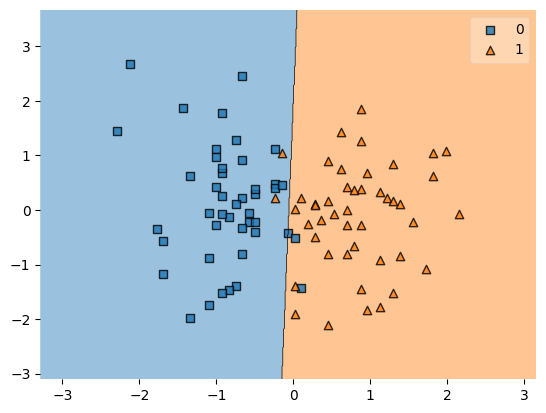

In [33]:
plot_decision_regions(X_train_scaled, y_train.values, clf=clf, legend = 1)

In [34]:
import pickle

In [35]:
pickle.dump(clf, open('output/model.pkl','wb'))